<a href='https://ccpf.proscan.com/programs/queen-city-classic-chess-tournament/'><img src='https://ccpf.proscan.com/wp-content/themes/proscanfund/library/images/sidebar-queen-city-classic-chess-tournament.png'/></a>
<div style='text-align: center'><h3>Part 2: The Data Strikes Back</h3></div>

### In [my previous notebook](./download_parse_results.ipynb), I talked about my kid's involvement in a recent chess tournament, how the organizers published the results, and my challenge of simply downloading and parsing that data.

### Now, in this Part 2 of that journey, I will load the parsed data into dataframes and see what sort of observations I can make of it.

### Step 1: Import the packages

In [1]:
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from wordcloud import WordCloud
import re

%matplotlib inline
plt.style.use('fivethirtyeight')

### Step 2: Import the data
#### First, import the results of the non-ranked players

In [2]:
nonrated_header = ['category', 'rank', 'name', 'team_abbrev', 'Pts', 'TBrk1', 'TBrk2', 'TBrk3', 'Rnd1', 'Rnd2', 
                       'Rnd3', 'Rnd4', 'Rnd5']

df_nonrated = pd.read_csv('./data/queen_city_2018_non_ranked_player_results.csv', names=nonrated_header, 
                           index_col=['category', 'rank'], encoding = "ISO-8859-1")

print(df_nonrated.info())
df_nonrated.head()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 468 entries, (nkFINALIndividual, 1) to (n1012FINALIndividual, 28)
Data columns (total 11 columns):
name           468 non-null object
team_abbrev    468 non-null object
Pts            468 non-null float64
TBrk1          468 non-null float64
TBrk2          468 non-null float64
TBrk3          468 non-null float64
Rnd1           468 non-null object
Rnd2           468 non-null object
Rnd3           468 non-null object
Rnd4           468 non-null object
Rnd5           468 non-null object
dtypes: float64(4), object(7)
memory usage: 42.2+ KB
None


name team_abbrev  Pts  TBrk1  TBrk2  \
category          rank                                                         
nkFINALIndividual 1                Chu, Anson         CCL  4.5    8.5   14.0   
                  2                Xie, Ethan      Dragon  4.0    7.0   13.0   
                  3             Zhang, Philip      Dragon  3.0    8.0   12.5   
                  4            Zhang, Phineas      Dragon  3.0    5.5   10.0   
                  5     Wong Miller, Ming Duq      StJosS  2.5   10.0   14.5   

                        TBrk3 Rnd1 Rnd2 Rnd3 Rnd4 Rnd5  
category          rank                                  
nkFINALIndividual 1      25.0   W5   W4   W2   D3   W6  
                  2      17.0   W6   W3   L1   W5   W7  
                  3      10.0   W8   L2   W7   D1   D5  
                  4       6.0   W7   L1   L5   W6   W8  
                  5       9.0   L1   W8   W4   L2   D3

#### Next, import the ranked player results

In [3]:
rated_header = ['category', 'rank', 'name', 'team_abbrev', 'rate', 'Pts', 'TBrk1', 'TBrk2', 'TBrk3', 'Rnd1', 'Rnd2', 
                 'Rnd3', 'Rnd4', 'Rnd5']

df_rated = pd.read_csv('./data/queen_city_2018_ranked_player_results.csv', names=rated_header, 
                        index_col=['category', 'rank'], encoding="ISO-8859-1")

print(df_rated.info())
df_rated.head()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 208 entries, (rk12FINALind, 1) to (r79FINALind, 62)
Data columns (total 12 columns):
name           208 non-null object
team_abbrev    208 non-null object
rate           208 non-null object
Pts            208 non-null float64
TBrk1          208 non-null float64
TBrk2          208 non-null float64
TBrk3          208 non-null float64
Rnd1           208 non-null object
Rnd2           208 non-null object
Rnd3           208 non-null object
Rnd4           208 non-null object
Rnd5           208 non-null object
dtypes: float64(4), object(8)
memory usage: 20.5+ KB
None


name team_abbrev  rate  Pts  TBrk1  TBrk2  \
category     rank                                                          
rk12FINALind 1        Storn, Justin      Turpin  2118  5.0   13.5   15.5   
             2       Dinesh, Abinav      SycamA  1791  4.5   11.5   13.5   
             3     Bradford, Lauren      DetCCC  1590  4.0   12.5   14.0   
             4       Hamilton, Jada      DetCCC  1558  4.0   10.0   11.5   
             5     Hamilton, Jaidyn      DetCCC  1707  3.5   14.5   16.0   

                   TBrk3 Rnd1 Rnd2 Rnd3 Rnd4 Rnd5  
category     rank                                  
rk12FINALind 1      31.0  W23   W3  W13  W11   W5  
             2      23.5  W25  W20   D6  W19   W9  
             3      18.0  W32   L1  W30  W16  W10  
             4      17.0  W33   L9  W27  W26  W12  
             5      19.5  W30  D21   W8   W6   L1

#### Now, import the team results

In [4]:
team_header = ['category', 'place', 'team_abbrev', 'name', 'Score', 'Med', 'Solk', 'SBx2', 'Cum']

df_team = pd.read_csv('./data/queen_city_2018_team_results.csv', names=team_header, index_col=['category', 'place'], 
                      encoding='ISO-8859-1')

print(df_team.info())
df_team.head()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 134 entries, (NR  K  Team, 1) to (r79FINALteam, 8)
Data columns (total 7 columns):
team_abbrev    134 non-null object
name           134 non-null object
Score          134 non-null object
Med            134 non-null float64
Solk           134 non-null float64
SBx2           134 non-null float64
Cum            134 non-null object
dtypes: float64(3), object(4)
memory usage: 8.0+ KB
None


team_abbrev                         name Score   Med  \
category      place                                                        
NR  K  Team 1          Dragon      Dragon Chess Center (3)  10.0  20.5   
              2          DetCCC  Detroit City Chess Club (2)   1.5  14.5   
NR  1  Team 1          Dragon      Dragon Chess Center (4)  13.0  25.5   
              2          DetCCC  Detroit City Chess Club (4)   8.0  20.0   
              3          CinCDS   Cincinnati Country Day (2)   4.5  11.0   

                     Solk  SBx2   Cum  
category      place                    
NR  K  Team 1      35.5  33.0  29.5  
              2      23.0   1.5   4.0  
NR  1  Team 1      44.5  69.0  41.0  
              2      34.0  35.5  22.0  
              3      17.5   6.0   8.0

#### ...and just in case I need it for reference, import the registered players list

In [5]:
players_header = ['orig_filename', 'first_name', 'last_name', 'grade', 'team', 'section', 'simul']

df_players = pd.read_csv('./data/queen_city_2018_registered_players.csv', names=players_header, encoding='ISO-8859-1')

print(df_players.info())
df_players.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 7 columns):
orig_filename    699 non-null object
first_name       699 non-null object
last_name        699 non-null object
grade            699 non-null object
team             699 non-null object
section          699 non-null object
simul            699 non-null object
dtypes: object(7)
memory usage: 38.3+ KB
None


,orig_filename,first_name,last_name,grade,team,section,simul
0,Player list as of 03.02.18 at noon_by player name,Parker,Adams,7,R to D2,7-9 NON-RATED,NO
1,Player list as of 03.02.18 at noon_by player name,Eric,Albers,7,CCL,RATED 7-9 OPEN,YES
2,Player list as of 03.02.18 at noon_by player name,Isaiah,Albert,8,Detroit City Chess Club,RATED 7-9 OPEN,NO
3,Player list as of 03.02.18 at noon_by player name,Rilan,Alcorn,7,Dayton Middle/High School,7-9 NON-RATED,NO
4,Player list as of 03.02.18 at noon_by player name,Rachit,Aleti,5,Dragon Chess Center,5 NON-RATED,NO


### Step 3: Try to address any mal-formed data problems
#### Given that I had to do [some crazy gymnastics](./download_parse_results.ipynb) to extract the data from PDFs and transform it into a parsable product, You can't expect all the data to transform without incident.  The first problem I found was with the players list:

In [6]:
# reviewing the players list data, I noticed a problem: if you write out all the unique section values, there are two that
# do not make immediate sense:
print('Hmm.  Weird values in the "section" column...')
print(df_players.section.unique().tolist())
print('\n')

# See the 'SIMUL ONLY' and 'YES' values?
# The 'SIMUL ONLY' is strange, but the values seemed to parse correctly:
print('Interestingly, though, that "SIMUL ONLY" seems to be a normal value and none of the data appears to be skewed.')
print(df_players.loc[df_players.section=='SIMUL ONLY', ['first_name', 'last_name', 'grade', 'team', 'section', 'simul']])
print('\n')

# However, the 'YES' value was the result of a bad parse job from my previous notebook:
print('However, that "YES" value does seem to indicate a problem:')
print(df_players.loc[df_players.section=='YES', ['first_name', 'last_name', 'grade', 'team', 'section', 'simul']])
print('\n')

# Furthermore, the bad parsing messed up the next data row, but, interestingly no others after that:
print('Fortunately, only two rows appear to be messed up:')
i = df_players.loc[df_players.section=='YES'].index.values[0]
print(df_players.iloc[i:i + 3, 1:])
print('\n')

# Looking back at the original PDF, the organizers left William Stock's grade completely empty, causing my regex to grab
# the next available text, "n/a" (his school value), for the grade column.  This, of course, caused every value to shift
# by one column.  I can seen, then, how this cascaded down to the next player, Serenity Stonom, but I'm perplexed and 
# grateful the shifting stopped there.  I think I'll a little manual repair here to fix the matter:
df_players.drop([i, i + 1], inplace=True)  # drop the two messed up rows
df_players = df_players.append({'orig_filename': 'Player list as of 03.02.18 at noon_by player name', 
                                'first_name': 'William', 'last_name': 'Stock', 'grade': '', 'team': 'n/a', 
                                'section': 'SIMUL ONLY', 'simul': 'YES'}, ignore_index=True)
df_players = df_players.append({'orig_filename': 'Player list as of 03.02.18 at noon_by player name', 
                                'first_name': 'Serenity', 'last_name': 'Stonom', 'grade': '7', 'team': 'North College Hill', 
                                'section': '7-9 NON-RATED', 'simul': 'NO'}, ignore_index=True)

print('So now, the number of rows with "YES" in the section colum should be zero.  Checking: {0}\n'.format(len(df_players.loc[df_players.section=='YES'])))

print('And the two fixed records should be corrected and at the bottom of the dataframe:')
df_players.tail()

Hmm.  Weird values in the "section" column...
['7-9 NON-RATED', 'RATED 7-9 OPEN', '5 NON-RATED', '6 NON-RATED', '1 NON-RATED', '10-12 NON-RATED', '3 NON-RATED', 'RATED K-12 OPEN', 'RATED 4-6 OPEN', '2 NON-RATED', '4 NON-RATED', 'RATED 4-6 < 800', 'RATED K-3 OPEN', 'K NON-RATED', 'SIMUL ONLY', 'YES']


Interestingly, though, that "SIMUL ONLY" seems to be a normal value and none of the data appears to be skewed.
    first_name last_name grade                    team     section simul
188    Michael    Giglio   n/a                     n/a  SIMUL ONLY   YES
252       Reed    Horton     5  Cincinnati Country Day  SIMUL ONLY    NO
479        Wes    Peters     5  Cincinnati Country Day  SIMUL ONLY    NO
558        Nik      Shah     5  Cincinnati Country Day  SIMUL ONLY    NO
573       Cade     Smith    11  Cincinnati Country Day  SIMUL ONLY   YES
681        Tao     Xiong     5  Cincinnati Country Day  SIMUL ONLY    NO


However, that "YES" value does seem to indicate a problem:
    first_name

,orig_filename,first_name,last_name,grade,team,section,simul
694,Player list as of 03.02.18 at noon_by player name,Phineas,Zhang,K,Dragon Chess Center,K NON-RATED,NO
695,Player list as of 03.02.18 at noon_by player name,Kevin,Zhou,1,Dragon Chess Center,1 NON-RATED,YES
696,Player list as of 03.02.18 at noon_by player name,Jason,Ziegler,7,Ludlow Independent Schools,7-9 NON-RATED,NO
697,Player list as of 03.02.18 at noon_by player name,William,Stock,,n/a,SIMUL ONLY,YES
698,Player list as of 03.02.18 at noon_by player name,Serenity,Stonom,7,North College Hill,7-9 NON-RATED,NO


#### I found another problem with the team results.  These two records, specifically, didn't parse quite right:

In [7]:
df_team[(df_team.Score == '(2)') | (df_team.Score == '(3)')]

,,team_abbrev,name,Score,Med,Solk,SBx2,Cum
category,place,,,,,,,
rk3FINALteam,3,GrtrCC,Greater Cincinnati Chinese Scho,(2),6.5,16.5,26.5,30.5 20.0
r46FINALteam,3,GrtrCC,Greater Cincinnati Chinese Scho,(3),6.5,24.0,41.5,30.5 24.5


#### So, let's get them fixed (we'll just do it manually like the players list above):

In [8]:
# Step 1: drop the bad rows: I'll do it by testing the Score value with a regex
df_team = df_team[df_team.Score.apply(lambda s: re.match(r'\d+', s) is not None)]

# Step 2: add back in the cleaned up records
clean_rows_list = [{'category': 'rk3FINALteam', 'place': '3', 'team_abbrev': 'GrtrCC', 
                    'name': 'Greater Cincinnati Chinese School (2)', 'Score': '6.5', 'Med': 16.5, 'Solk': 26.5, 
                    'SBx2': 30.5, 'Cum': '20.0'}, 
                   {'category': 'r46FINALteam', 'place': '3', 'team_abbrev': 'GrtrCC', 
                    'name': 'Greater Cincinnati Chinese School (2)', 'Score': '6.5', 'Med': 24.0, 'Solk': 41.5, 
                    'SBx2': 30.5, 'Cum': '24.5'}]
clean_rows_df = pd.DataFrame(clean_rows_list, columns=clean_rows_list[0].keys())
clean_rows_df.set_index(['category', 'place'], inplace=True)  # concatenating with multi indexes is tricky

df_team = pd.concat([df_team, clean_rows_df])

In [9]:
# looks better now
df_team.tail()

team_abbrev                                   name Score  \
category     place                                                            
r79FINALteam 6           Mason                              Mason (3)   6.0   
             7          SuperS             Super Saturday Knights (2)   5.0   
             8          Beechw                          Beechwood (2)   3.0   
rk3FINALteam 3          GrtrCC  Greater Cincinnati Chinese School (2)   6.5   
r46FINALteam 3          GrtrCC  Greater Cincinnati Chinese School (2)   6.5   

                     Med  Solk  SBx2   Cum  
category     place                          
r79FINALteam 6      17.5  29.5  12.5  13.0  
             7      14.0  22.0  18.0  18.0  
             8      13.5  22.0   9.0   8.5  
rk3FINALteam 3      16.5  26.5  30.5  20.0  
r46FINALteam 3      24.0  41.5  30.5  24.5

### Step 4: Ok, now that we've got the data cleaned up, let's start looking at it
#### Let's start by looking at some of the general demographics

In [16]:
print('{0} players competed in the tournament.'.format(df_players.shape[0]))
print('{0} teams competed in the tournament.'.format(df_team.shape[0]) )

699 players competed in the tournament.
134 teams competed in the tournament.


Text(0,0.5,'Grade')

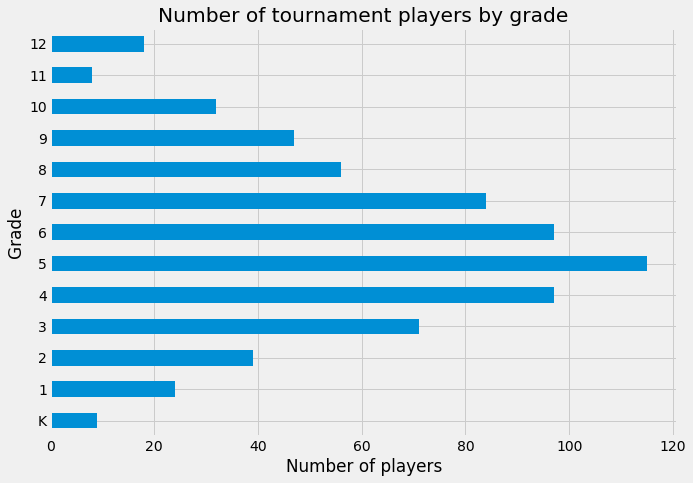

In [17]:
title = 'Number of tournament players by grade'
grade_labels = ['K'] + [str(x) for x in range(1, 13)]

# here, i'll work with a copy of the dataframe
df1 = df_players.copy()
df1['grade'] = pd.Categorical(df1['grade'], grade_labels)  # mark the "grade" column as categorical so i can custom sort it
ax = df1[df1.grade.isin(grade_labels)].sort_values('grade').groupby('grade').size().plot.barh(figsize=(10,7), title=title)
ax.set_xlabel('Number of players')
ax.set_ylabel('Grade')

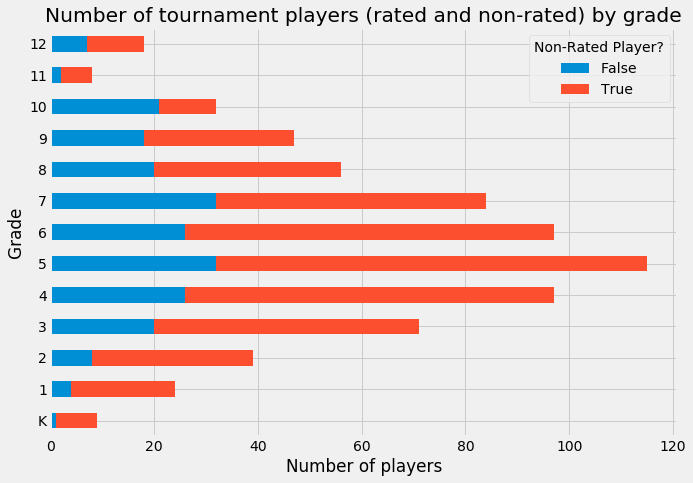

In [18]:
df1['nr_flag'] = df1.section.str.contains('NON-RATED')  # label whether a player is rated or not

title = 'Number of tournament players (rated and non-rated) by grade'
ax = (df1[df1.grade.isin(grade_labels)].sort_values('grade').groupby(['grade', 'nr_flag']).size().unstack().plot.
      barh(stacked=True, figsize=(10,7), title=title))
ax.set_xlabel('Number of players')
ax.set_ylabel('Grade')
ax.legend(title='Non-Rated Player?')

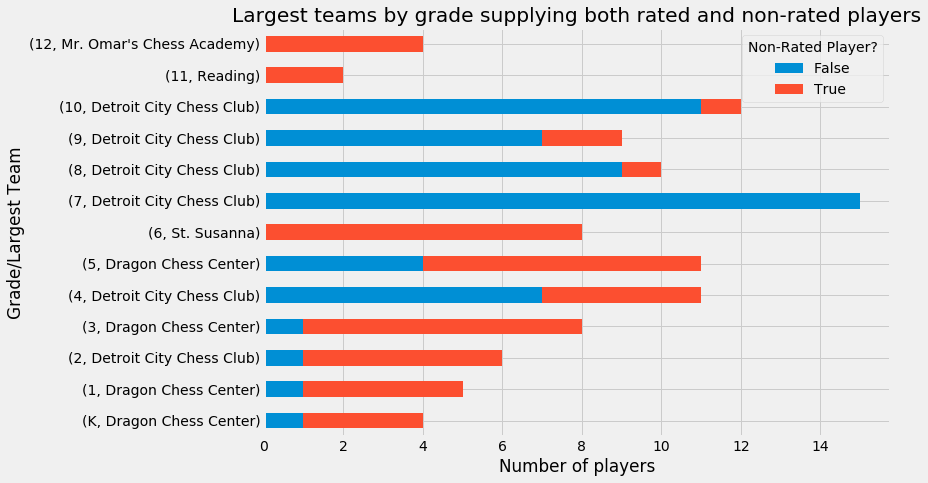

In [19]:
title = 'Largest teams by grade supplying both rated and non-rated players'

df2 = (df1[df1.grade.isin(grade_labels)].sort_values('grade').groupby(['grade', 'team', 'nr_flag']).size().
       to_frame().unstack().fillna(0))
df2.columns = df2.columns.droplevel()
df2['tot'] = df2.sum(axis=1)

ax = (df2.reset_index().sort_values(['grade', 'tot']).set_index(['grade', 'team']).groupby(level=0).tail(1).
      loc[:, df2.columns != 'tot'].plot.barh(stacked=True, title=title, figsize=(10,7)))
ax.set_xlabel('Number of players')
ax.set_ylabel('Grade/Largest Team')
ax.legend(title='Non-Rated Player?')

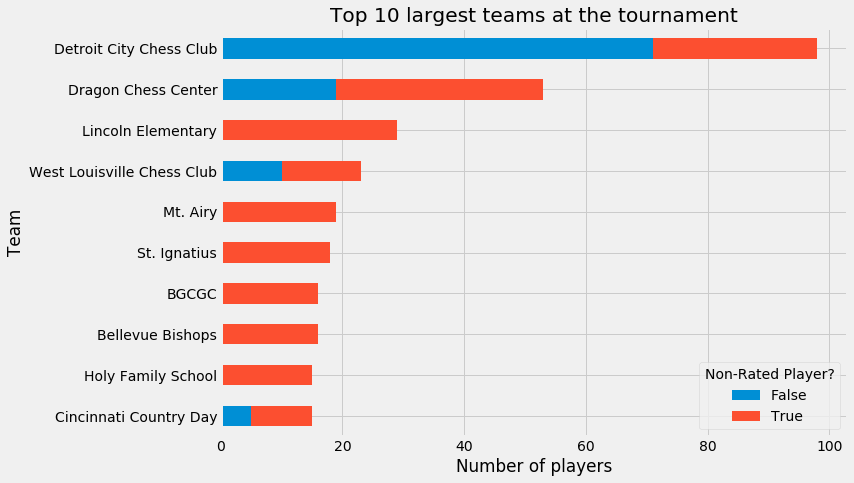

In [20]:
title = 'Top 10 largest teams at the tournament'

ax = (df2.groupby('team').agg({False:sum, True:sum, 'tot':sum}).sort_values('tot', ascending=False).head(10).
      loc[:, df2.columns != 'tot'].iloc[::-1].plot.barh(stacked=True, title=title, figsize=(10,7)))
ax.set_xlabel('Number of players')
ax.set_ylabel('Team')
ax.legend(title='Non-Rated Player?')

Text(0,0.5,'Team')

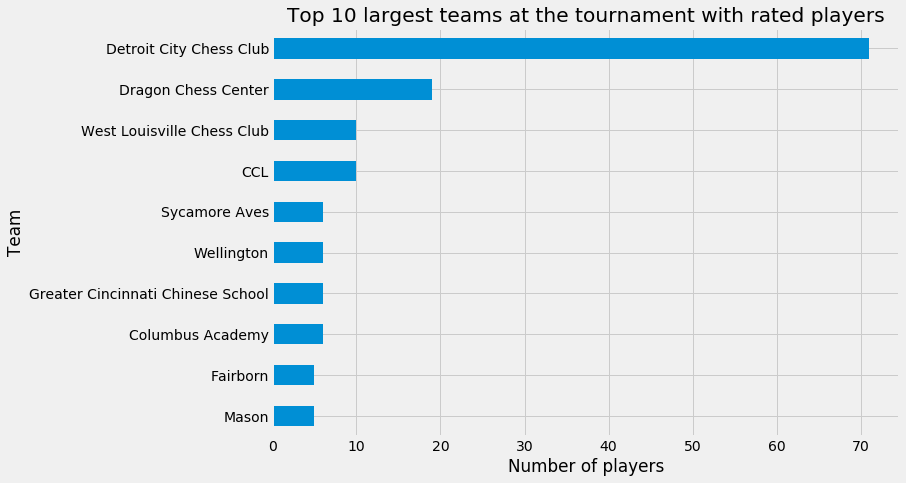

In [21]:
title = 'Top 10 largest teams at the tournament with rated players'

ax = (df2.groupby('team').agg({False:sum}).sort_values(False, ascending=False).head(10).
      iloc[::-1].plot.barh(title=title, figsize=(10,7), legend=None))
ax.set_xlabel('Number of players')
ax.set_ylabel('Team')

Text(0,0.5,'Team')

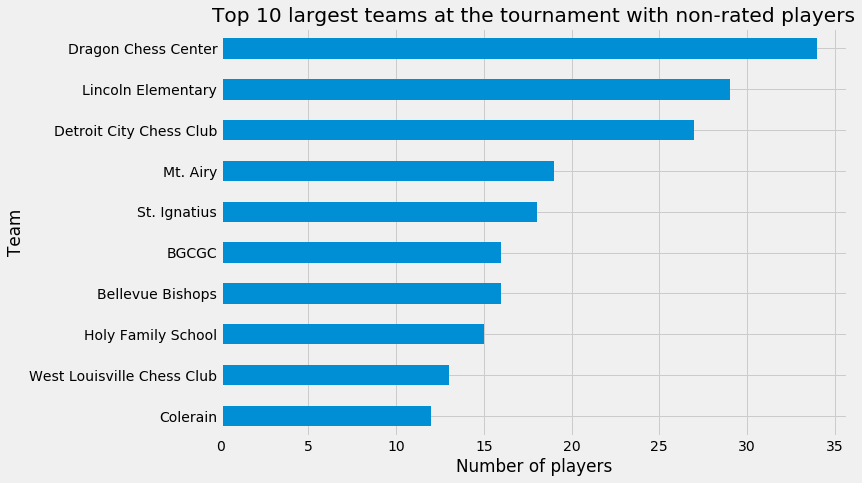

In [22]:
title = 'Top 10 largest teams at the tournament with non-rated players'

ax = (df2.groupby('team').agg({True:sum}).sort_values(True, ascending=False).head(10).
      iloc[::-1].plot.barh(title=title, figsize=(10,7), legend=None))
ax.set_xlabel('Number of players')
ax.set_ylabel('Team')

#### How about a wordcloud depicting team sizes?  You know, for the blog...

(-0.5, 399.5, 199.5, -0.5)

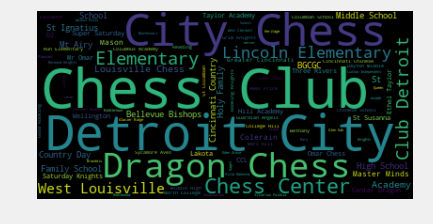

In [23]:
wordcloud = WordCloud().generate('\n'.join(df_players.team.tolist()))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

#### How about taking a look at the tournament results?  (I'm going to focus on the team and player scores and not on the [tie-breaking values](https://en.wikipedia.org/wiki/Tie-breaking_in_Swiss-system_tournaments))

In [24]:
# let's do a little more data prep work in this cell

# don't know about you, but these categories are way too cryptic, so I'll change them to be slightly more meaningful
# although I don't understand how there can be a K-12 rated category (Kindergarteners playing high school Seniors?)
# nor do I have any idea what "under 800" means in the rated category.
old_category_vals = ['NR \x96 K \x96 Team', 'NR \x96 1 \x96 Team', 'n2FINALtm', 'n3FINALtm', 'n4FINALtm', 'n5FINALtm', 'n6FINALTeams', 'n79FINALTeams', 'n1012FINALTeams', 'rk12FINALteam', 'rk3FINALteam', 'r46u800FINALteam', 'r46FINALteam', 'r79FINALteam']
new_category_vals = ['K, non-rated', '1, non-rated', '2, non-rated', '3, non-rated', '4, non-rated', '5, non-rated', '6, non-rated', '7-9, non-rated', '10-12, non-rated', 'K-12, rated', 'K-3, rated', '4-6 under 800, rated', '4-6, rated', '7-9, rated']

df_team_scores = df_team.reset_index().copy()
df_team_scores.category.replace(old_category_vals, new_category_vals, inplace=True)

# let's also mark the category column as Categorical 
df_team_scores['category'] = pd.Categorical(df_team_scores['category'], new_category_vals)

# i'm sure the parentheses behind each team name mean something, but let's also make available a clean team name
df_team_scores['clean_name'] = df_team_scores.name.apply(lambda n: re.sub(r' \(\d+\)', '', n))

# since i'm going to do some visuals on the Score column, i need to make sure its cast as a float
df_team_scores['Score'] = df_team_scores.Score.astype(float)

Text(0,0.5,'Category and First Place Team')

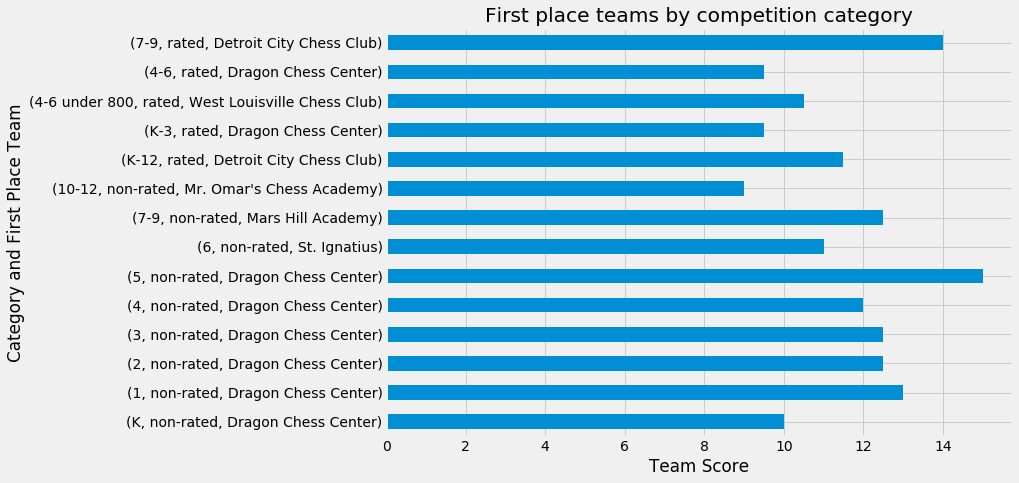

In [25]:
title = 'First place teams by competition category'

ax = (df_team_scores.loc[:, ['category', 'place', 'clean_name', 'Score']].sort_values(['category', 'place']).
      set_index(['category', 'clean_name']).groupby(level=0).head(1).loc[:, ['Score']].
      plot.barh(title=title, figsize=(10,7), legend=None))

ax.set_xlabel('Team Score')
ax.set_ylabel('Category and First Place Team')

In [26]:
print('Top 10 Teams across all Categories')
df_team_scores.loc[:, ['clean_name', 'Score']].groupby('clean_name').sum().sort_values('Score', ascending=False).head(10)

Top 10 Teams across all Categories


,Score
clean_name,
Dragon Chess Center,133.5
Detroit City Chess Club,107.5
Lincoln Elementary,45.0
St. Ignatius,41.5
Mt. Airy,33.0
CCL,29.5
Reading,24.0
West Louisville Chess Club,23.5
Colerain,21.5


In [27]:
print('Interesting.  Even though the Detroit City Chess Club brought {0} competitors to the tournament, '
      'nearly doubling the {1} competitors fielded by Dragon Chess Center, Dragon Chess Center still scored higher overall.  '
      'I wonder how important a team\'s size is to the success of the player?'.
      format(df_players[df_players.team=='Detroit City Chess Club'].count().values[0], 
             df_players[df_players.team=='Dragon Chess Center'].count().values[0])) 

Interesting.  Even though the Detroit City Chess Club brought 98 competitors to the tournament, nearly doubling the 53 competitors fielded by Dragon Chess Center, Dragon Chess Center still scored higher overall.  I wonder how important a team's size is to the success of the player?


#### Rated players' five number summaries:

In [28]:
print('Rated players five number summary across all players:\n')
print(df_rated.Pts.describe())
print('\nRated players five number summary by competition category:\n')
print(df_rated.groupby('category').Pts.describe())
print('\nRated players five number summary by team:\n')
print(df_rated.groupby('team_abbrev').Pts.describe())

Rated players five number summary across all players:

count    208.000000
mean       2.524038
std        1.022406
min        0.000000
25%        2.000000
50%        2.500000
75%        3.000000
max        5.000000
Name: Pts, dtype: float64

Rated players five number summary by competition category:

                 count      mean       std  min    25%   50%  75%  max
category                                                              
r46FINALind       32.0  2.500000  1.008032  0.5  2.000  2.50  3.0  4.5
r46u800FINALind   47.0  2.553191  0.995828  1.0  2.000  2.50  3.0  5.0
r79FINALind       62.0  2.500000  1.071233  0.0  2.000  2.25  3.0  5.0
rk12FINALind      38.0  2.500000  1.084286  0.0  1.625  2.50  3.0  5.0
rk3FINALind       29.0  2.586207  0.954959  1.0  2.000  2.50  3.0  5.0

Rated players five number summary by team:

             count      mean       std  min    25%   50%    75%  max
team_abbrev                                                         
Beechw         2.0

#### Non-rated players' five number summaries:

In [29]:
print('Non-rated players five number summary across all players:\n')
print(df_nonrated.Pts.describe())
print('\nNon-rated players five number summary by competition category:\n')
print(df_nonrated.groupby('category').Pts.describe())
print('\nNon-rated players five number summary by team:\n')
print(df_nonrated.groupby('team_abbrev').Pts.describe())

Non-rated players five number summary across all players:

count    468.000000
mean       2.431624
std        1.168201
min        0.000000
25%        1.500000
50%        2.500000
75%        3.000000
max        5.000000
Name: Pts, dtype: float64

Non-rated players five number summary by competition category:

                      count      mean       std  min    25%   50%    75%  max
category                                                                     
NR  1  Individual    20.0  2.500000  1.169795  0.0  2.000  2.25  3.000  5.0
n1012FINALIndividual   28.0  2.464286  1.146077  0.0  1.875  2.50  3.000  5.0
n2FINALind             26.0  2.538462  1.066987  0.5  2.000  2.50  3.000  5.0
n3FINALind             46.0  2.500000  1.100505  0.0  1.625  2.50  3.375  5.0
n4FINALind             70.0  2.400000  1.172140  0.0  1.500  2.50  3.000  5.0
n5FINALind             85.0  2.329412  1.276045  0.0  1.500  2.50  3.000  5.0
n6FinalIndividual      71.0  2.436620  1.155513  0.0  1.750  2.50 

#### Let's take a look at how the players from the largest teams in the tournament scored?

C:\Users\brad\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


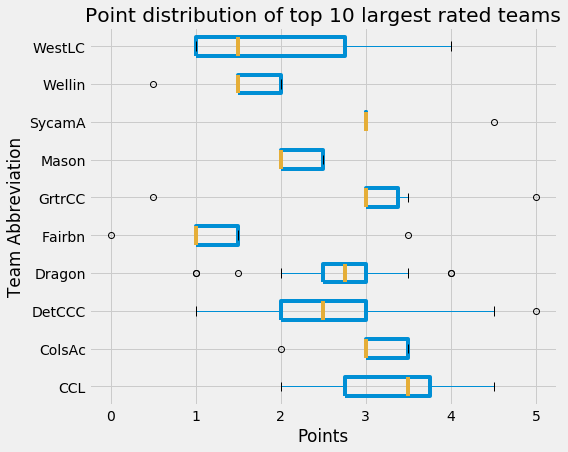

In [39]:
title = 'Point distribution of top 10 largest rated teams'
top10 = df_rated.groupby('team_abbrev').count().loc[:,['name']].sort_values('name', ascending=False).head(10).index.values

ax = (df_rated[df_rated.team_abbrev.isin(top10)].reset_index().loc[:, ['team_abbrev', 'Pts']].
      boxplot(column='Pts', by='team_abbrev', vert=False, figsize=(10,7), boxprops=boxprops, medianprops=medianprops))
ax.set_title(title)
ax.set_xlabel('Points')
ax.set_ylabel('Team Abbreviation')
plt.subplots_adjust(left=0.25)
plt.suptitle("")
plt.show()

C:\Users\brad\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


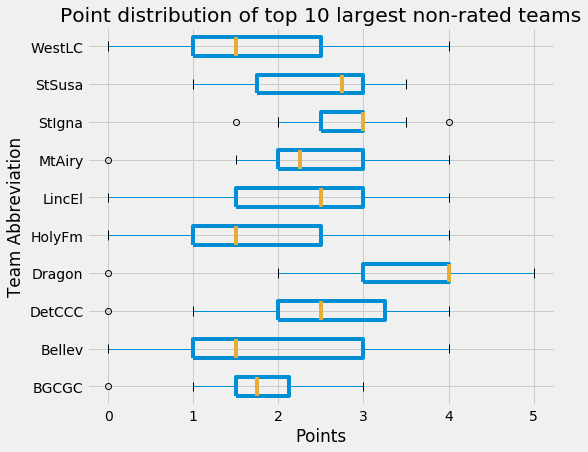

In [40]:
title = 'Point distribution of top 10 largest non-rated teams'

top10 = df_nonrated.groupby('team_abbrev').count().loc[:,['name']].sort_values('name', ascending=False).head(10).index.values

ax = (df_nonrated[df_nonrated.team_abbrev.isin(top10)].reset_index().loc[:, ['team_abbrev', 'Pts']].
      boxplot(column='Pts', by='team_abbrev', vert=False, figsize=(10,7), boxprops=boxprops, medianprops=medianprops))
ax.set_title(title)
ax.set_xlabel('Points')
ax.set_ylabel('Team Abbreviation')
plt.subplots_adjust(left=0.25)
plt.suptitle("")
plt.show()

#### Initially, I assumed that the larger teams tended to bring the more power players; however, the boxplots above don't seem to bear that out, if we consider the score of 3.5 and above to be the mark of a more powerful player.  Of course, it could very well be that the large team sizes are bringing the overall averages down.

#### On a related note, look at the non-rated players from Dragon Chess Center: they really performed well!

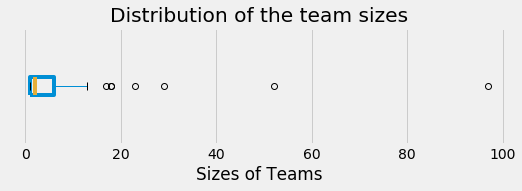

In [32]:
title = 'Distribution of the team sizes'
boxprops = dict(linestyle='-', linewidth=4, color='k')
medianprops = dict(linestyle='-', linewidth=4, color='k')

df_team_sizes = pd.concat([df_rated.groupby('team_abbrev').count().loc[:,['name']], 
                           df_nonrated.groupby('team_abbrev').count().loc[:,['name']]]).groupby('team_abbrev').sum()

ax = df_team_sizes.boxplot(vert=False, figsize=(10,2), boxprops=boxprops, medianprops=medianprops)
ax.set_title(title)
ax.set_xlabel('Sizes of Teams')
plt.yticks([])
plt.subplots_adjust(left=0.25)
plt.suptitle("")
plt.show()

In [33]:
print('I\'m a little surprised that the average team size at the tournament was only {0:.1f} players.  '
      'I thought it\'d be bigger.  I wonder if a player\'s was better or worse based on the size team he/she hailed from?'.
      format(df_team_sizes.mean()[0])) 

I'm a little surprised that the average team size at the tournament was only 5.2 players.  I thought it'd be bigger.  I wonder if a player's was better or worse based on the size team he/she hailed from?


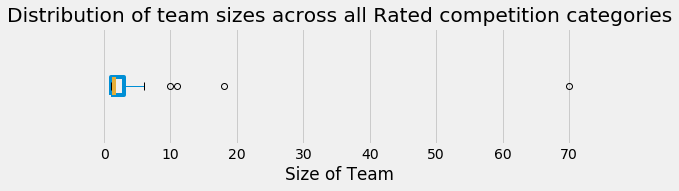

In [34]:
title = 'Distribution of team sizes across all Rated competition categories'

ax = (df_rated.groupby(['team_abbrev']).count().loc[:,['name']].
      boxplot(vert=False, figsize=(10,2), boxprops=boxprops, medianprops=medianprops))

ax.set_title(title)
ax.set_xlabel('Size of Team')
plt.yticks([])
plt.subplots_adjust(left=0.25)
plt.suptitle("")
plt.show()

C:\Users\brad\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


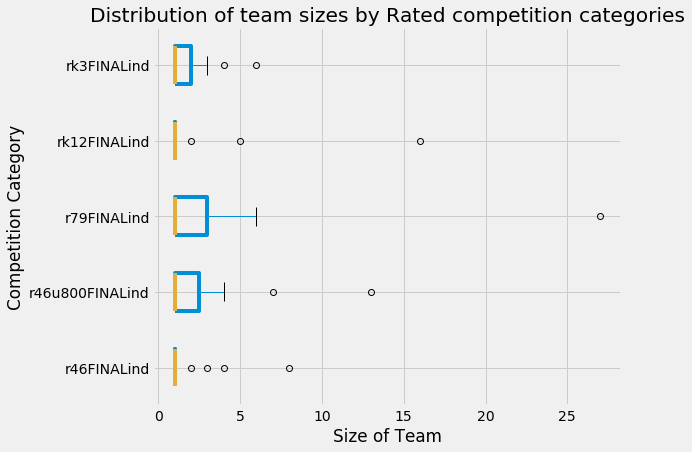

In [35]:
title = 'Distribution of team sizes by Rated competition categories'

ax = (df_rated.groupby(['category', 'team_abbrev']).count().loc[:,['name']].
      boxplot(column='name', by='category', vert=False, figsize=(10,7), boxprops=boxprops, medianprops=medianprops))

ax.set_title(title)
ax.set_xlabel('Size of Team')
ax.set_ylabel('Competition Category')
plt.subplots_adjust(left=0.25)
plt.suptitle("")
plt.show()

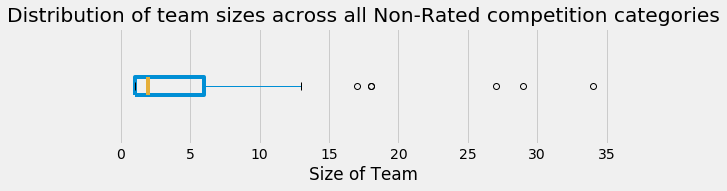

In [36]:
title = 'Distribution of team sizes across all Non-Rated competition categories'

ax = (df_nonrated.groupby(['team_abbrev']).count().loc[:,['name']].
      boxplot(vert=False, figsize=(10,2), boxprops=boxprops, medianprops=medianprops))

ax.set_title(title)
ax.set_xlabel('Size of Team')
plt.yticks([])
plt.subplots_adjust(left=0.25)
plt.suptitle("")
plt.show()

C:\Users\brad\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


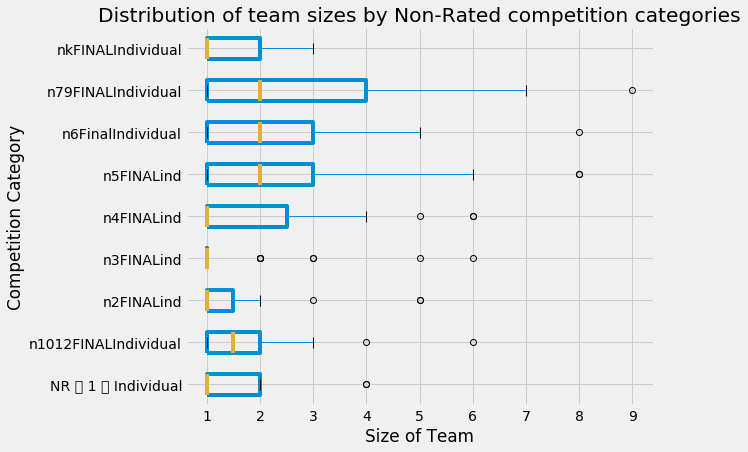

In [37]:
title = 'Distribution of team sizes by Non-Rated competition categories'

ax = (df_nonrated.groupby(['category', 'team_abbrev']).count().loc[:,['name']].
      boxplot(column='name', by='category', vert=False, figsize=(10,7), boxprops=boxprops, medianprops=medianprops))

ax.set_title(title)
ax.set_xlabel('Size of Team')
ax.set_ylabel('Competition Category')
plt.subplots_adjust(left=0.25)
plt.suptitle("")
plt.show()

In [38]:
# calc avg, median scores for each team
# team score distributions?  by category?  by grade?  top teams?
# team score distribution by team size
# prediction based on 1st match win?
# does having more players in a given category increase or decrease your odds of winning that category?